#  Laboratorium z Podstaw Przetwarzania Sygnałów
## Laboratorium 2 - podstawy przetwarzania sygnałów

prowadzący: dr inż. Łukasz Jeleń  
  
Dzisiejsze zadania pochodzą z Allen B. Downey, Think DSP, Digital Signal Processing in Python, Green Tea Press, Wersja 1.0.5

Nazwisko i Imię: Jan Zieniewicz  
Nr albumu: 263930   
data wykonania ćwiczenia: 25.10.2022r.  

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

## Zestaw narzędzi  

Na poprzednich zajęciach poznali Państwo narzędzia związane z pythonem. Dzisiaj proszę o zapoznanie się z narzędziami udostępnionymi przez Autora podręcznika "Think DSP". Zawiera on wiele przydatnych funkcji, które będziemy wykorzsytywali na zajęciach. W poniższej komórce macie Państo dane do ich pobrania. 

In [70]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Sygnały   
  
za:  
ThinkDSP  
Code examples from Chapter 1: Sounds and Signals  
Copyright 2015 Allen Downey  
License: Creative Commons Attribution 4.0 International

w oryginale można poczytać tutaj: http://tinyurl.com/thinkdsp01


Inicjalizacja syngnałów sinusoidalnych i cosinusoidalnych o zadanych parametrach

In [71]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)

wykres otrzymanych sygnałów

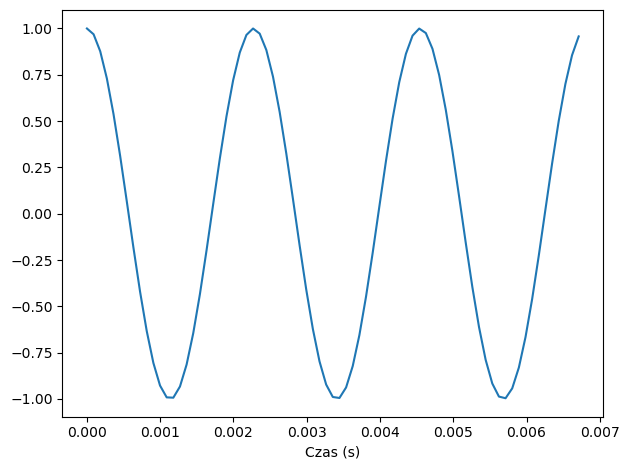

In [72]:
from thinkdsp import decorate
#cosinus
cos_sig.plot()
decorate(xlabel='Czas (s)')

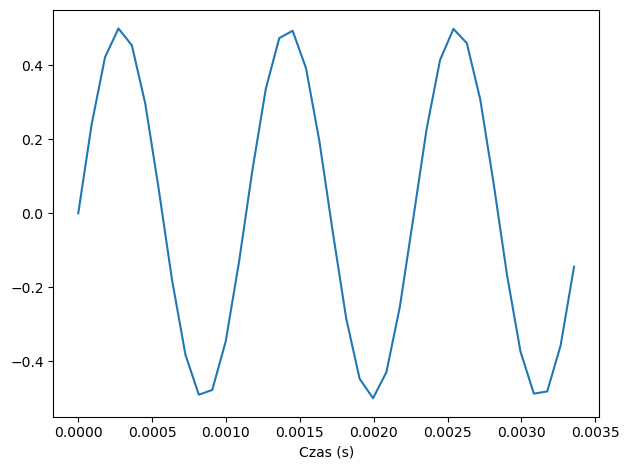

In [73]:
#sinus
sin_sig.plot()
decorate(xlabel='Czas (s)')

Proszę zauważyć, że częstotliwość sinusa wzrosła dwukrotnie, co spowodowało zmniejszenie okresu o połowę.  
  
Teraz dodamy te sygnały do siebie i wyświtlimy ich przebieg.

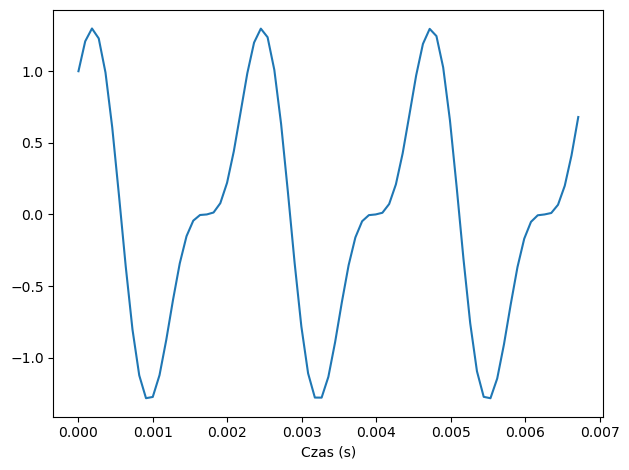

In [74]:
mix = sin_sig + cos_sig
mix.plot()
decorate(xlabel='Czas (s)')

#### Wnioski  
Możemy zauażyć, że sygnał jest matematyczną funkcją dla wszystkich wartości w czasie. 

## Fale dźwiękowe

Falą będziemy nazywali oszcowanie wartości sygnału w równych odstępach czasowych. Częstotliwość próbkowania (framerate) będzie ilością próbek w sekundzie.  
  
Utwórzmy falę z naszej sumy sygnałów:

In [75]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)

Jeśli nie mają Państwo zainstalowanego IPythona, to jest to dobry moment na doinstalowanie. Za pomocą widgetu IPythona możemy odsłuchać utworzoną przez nas falę dźwiękową. 

In [76]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

Teraz sprawdzimy jaka była ilość próbek oraz jaki był interwał między próbkami (wyznaczany jako odwrotność okresu). 

In [77]:
# zmienna ys jest tablicą numpy, która przechowuje wartości naszego sygnału
print('Ilość próbek', len(wave.ys))
print('Interwał w ms', 1 / wave.framerate * 1000)

Ilość próbek 5512
Interwał w ms 0.09070294784580499


Sygnały okresowe będą dodatkowo posiadały właściwość 'period'. Natowmiast obiekt 'wave' posiada metodę 'segment', która pozwoli na utworzenie nowego obiektu fali. My wykorzystamy tę metodę do utworzenia fali składającej się z 3 okresów obiktu 'wave'.

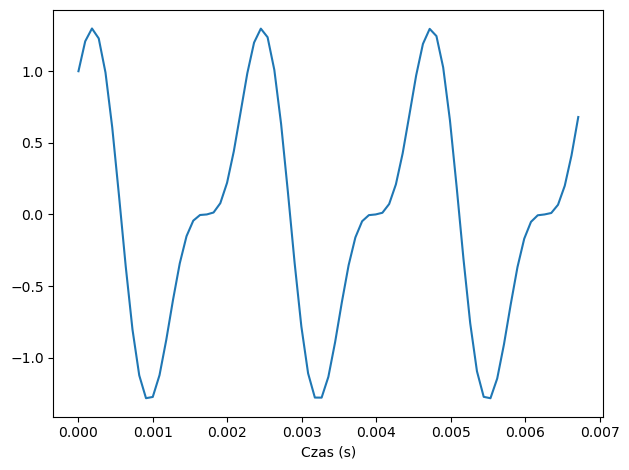

In [78]:
period = mix.period
segment = wave.segment(start=0, duration=period*3) #proszę sprawdzić różnicę zmieniając mnożnik okresu
segment.plot()
decorate(xlabel='Czas (s)')

Kolejnymi opreacjami, które możemy wykonać na sygnale jest normalizacja w przedziale (-1,1) oraz tzw. tapering - wyciaszanie sygnału na początku i końcu w celu minimalizacji tzw. "kliknięcia" przy odtwarzaniu.

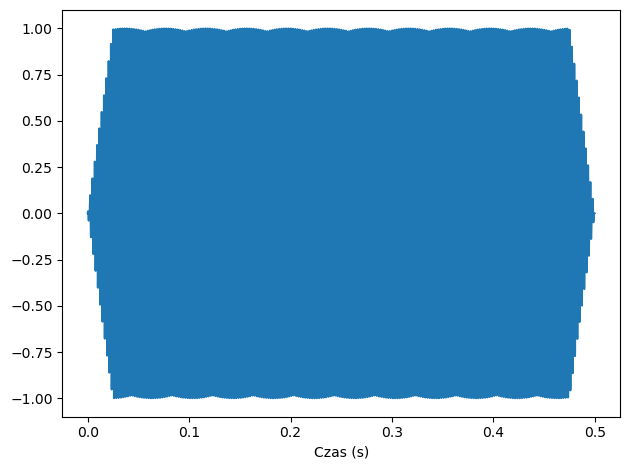

In [79]:
# Normalizacja
wave.normalize()
# Tapering
wave.apodize()
# przebieg
wave.plot()
decorate(xlabel='Czas (s)')

Możemy teraz zapisać utworzony sygnał jako plik 'temp.wav'

In [80]:
wave.write('temp.wav')

Writing temp.wav


oraz odczytać i odtworzyć.

In [81]:
from thinkdsp import play_wave

play_wave(filename='temp.wav', player='aplay')

wave.make_audio()


Playing WAVE 'temp.wav' : Signed 16 bit Little Endian, Rate 11025 Hz, Mono


## Pozostałe ćwiczenia  
  
również z Think DSP

### Zadanie 1

Ze strony http://freesound.org pobierz dźwięk zawierający muzykę, rozmowę lub inny dźwięk o dobrze zdefiniowanej tonacji. Z pobranego pliku pobierz ok. półsekundowy kawałek (patrz: wave.segment w przykładzie powyżej). Na tej podstawie wyznacz widmo sygnału oraz przedstaw na wykresie przebiek wybranego kawałka pliku. Zastanów się i podaj wniosek jaka jest zależność między barwą dźwięku a strukturą harmoniczną widoczną w wyznaczonym widmem. 

In [82]:
from thinkdsp import read_wave
melodia=read_wave(filename='Crash-Cymbal-2.wav')
melodia.make_audio()

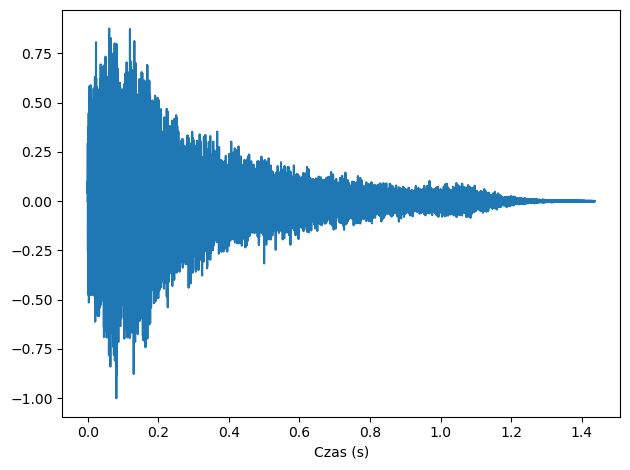

In [83]:
from thinkdsp import decorate
melodia.plot()
decorate(xlabel='Czas (s)')

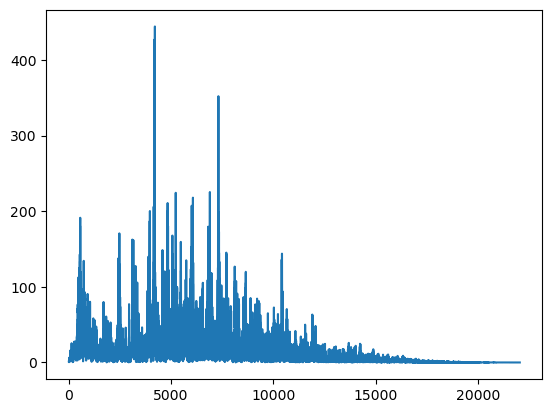

In [84]:
spektrum=melodia.make_spectrum()
spektrum.plot()

Zastosuj filtr górno-, dolno-przepustowy oraz środkowozaporowy do odfitrowania stosownych harmonicznych. Następnie przekonwertuj wyniki spowrotem do fali dźwiękowej i odsłuchaj. Porównaj wyniki i odpowiedz na pytanie jak dźwięk koresponduje do zmian wprowadzonych do widma? Zapisz spostrzeżenia dla każdego filtra.

### Filtr dolnoprzepustowy:

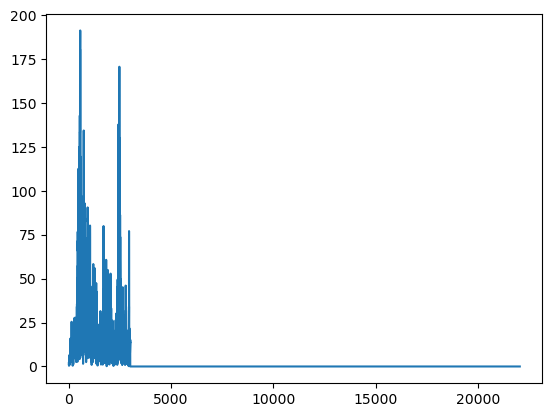

In [85]:
filtr_dolny=melodia.make_spectrum()

filtr_dolny.low_pass(3000)
filtr_dolny.plot()

In [86]:
melodia_pomoc=filtr_dolny.make_wave()
melodia_pomoc.make_audio()

##### Po zastosowaniu filtra dolnoprzepustowego  
i odfiltrowaniu sygnałów o częstotliwości powyżej 3kHZ sygnał dźwiękowy jest niższy od oryginału oraz jest "głuchy"

### Filtr górnoprzepustowy:

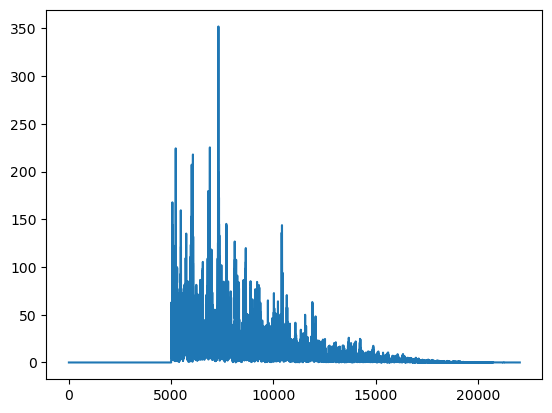

In [87]:
filtr_gorno=melodia.make_spectrum()
filtr_gorno.high_pass(5000)
filtr_gorno.plot()

In [88]:
melodia_pomoc=filtr_gorno.make_wave()
melodia_pomoc.make_audio()

##### Po zastosowaniu filtra górnoprzepustowego  
i odfiltrowaniu sygnałów o częstotliwości poniżej 5kHZ sygnał dźwiękowy jest wyższy od oryginału oraz jest "subtelny wysoki"

### Filtr środkowozaporowy:

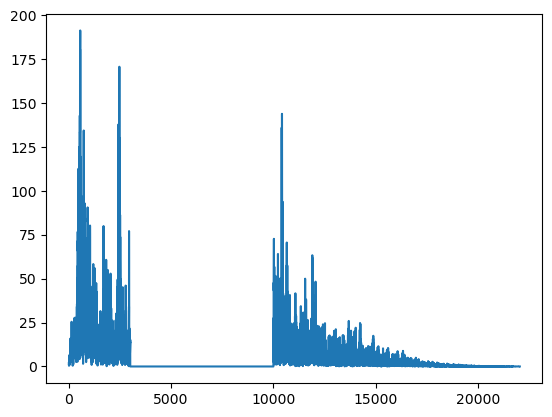

In [89]:
filtr_srodk=melodia.make_spectrum()
filtr_srodk.band_stop(3000, 10000)
filtr_srodk.plot()

In [90]:
melodia_pomoc=filtr_srodk.make_wave()
melodia_pomoc.make_audio()

##### Po zastosowaniu filtra środkowozaporowego  
i odfiltrowaniu sygnałów o częstotliwości między 3kHZ, a 5kHZ sygnał dźwiękowy jest "głuchy oraz spłaszczony"


### Zadanie 2

Stwórz syntetyczny sygnał poprzez zsumowanie utworzenych sygnałów sinusoidalnych i cosinusoidalnych (patrz przykłady powyżej). Przekonwertuj sygnał do fali dźwiękowej i posłuchaj jej. Następnie wyznacz widmo utworzonego sygnału oraz przedstaw jego przebieg na wykresie. Jaki będzie efekt jeżeli dodasz składowe częstotliwości, które nie jest wielokrotnością podstawowej składowej. 

In [106]:
from thinkdsp import CosSignal, SinSignal


cos_sig1 = CosSignal(freq=500, amp=1.0, offset=0)
sin_sig1= SinSignal(freq=250, amp=2, offset=0)
mix2=cos_sig1+sin_sig1




In [92]:
from IPython.display import Audio

mel=mix2.make_wave(duration=2, start=0, framerate=11025)

audio = Audio(data=mel.ys, rate=mel.framerate)
audio

In [93]:
cos_sig2 = CosSignal(freq=123, amp=1.0, offset=0)
sin_sig2= SinSignal(freq=777, amp=2, offset=0)
mix3=cos_sig2+sin_sig2

mel2=mix3.make_wave(duration=2, start=0, framerate=11025)
audio2= Audio(data=mel2.ys, rate=mel2.framerate)
audio2

#### Wniosek:  
Sygnał dźwiękowy otrzymany z zsumowania sygnałów sinusoidalnych i cosinusoidalnych o różnych składowych częstotliwości jest wyższy niż ten otrzymany z zsumowania sygnałów sinusoidalnych i cosinusoidalnych o tych samych składowych częstotliwości

wykres funkcji cosinus:

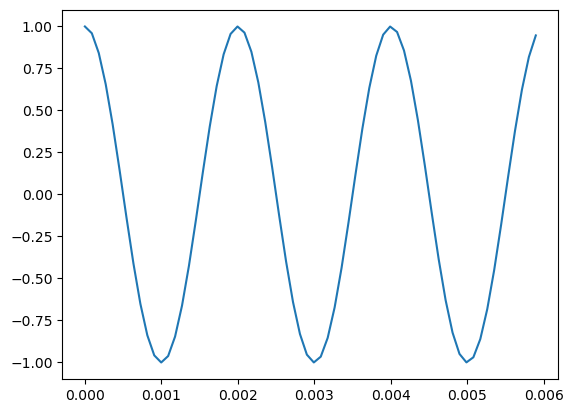

In [105]:
cos_sig1.plot()

Wykres funkcji sinus:

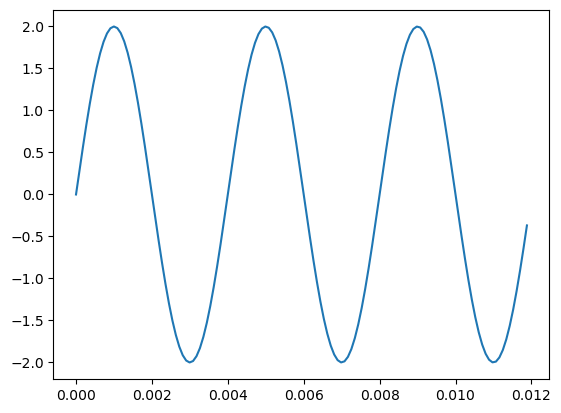

In [94]:
sin_sig1.plot()


Wykres funkcji powstałej przez zsumowanie 2 powyższych funkcji:

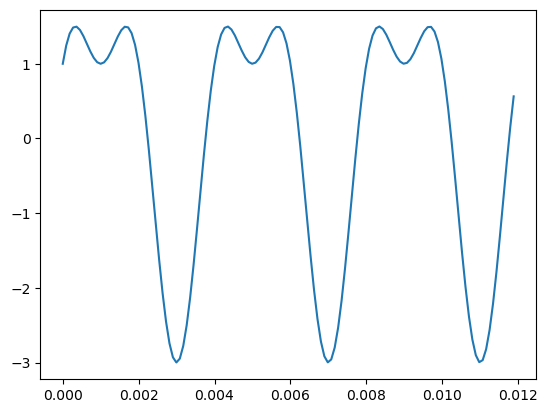

In [95]:
mix2.plot()

Wykres wszystkich funkcji:

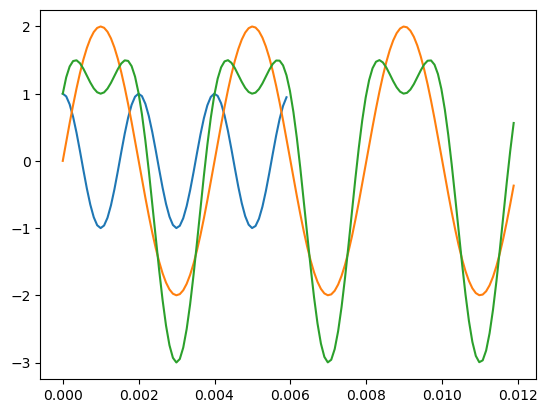

In [96]:
cos_sig1.plot()
sin_sig1.plot()
mix2.plot()

wykres funkcji cosinus:

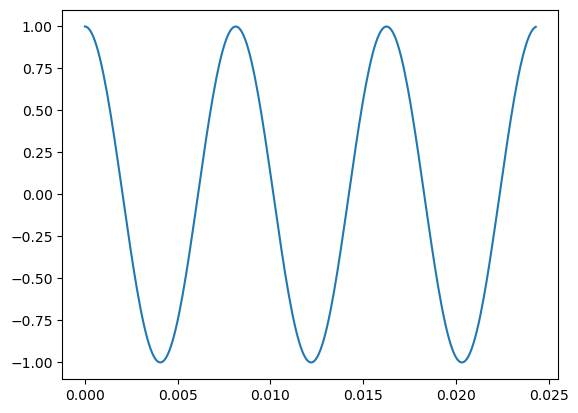

In [97]:
cos_sig2.plot()

wykres funkcji sinus:

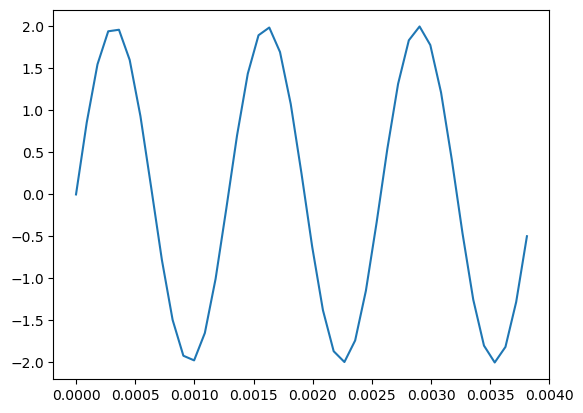

In [98]:
sin_sig2.plot()

Wykres funkcji powstałej przez zsumowanie 2 powyższych funkcji:

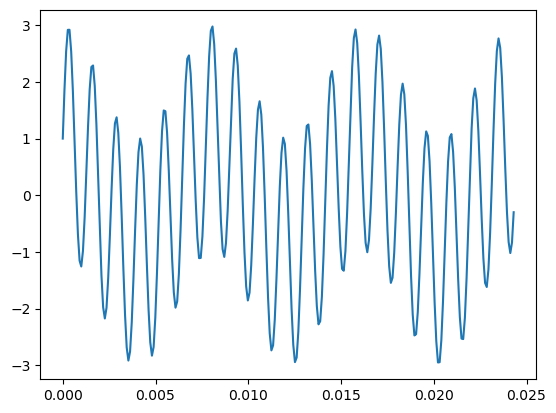

In [99]:
mix3.plot()

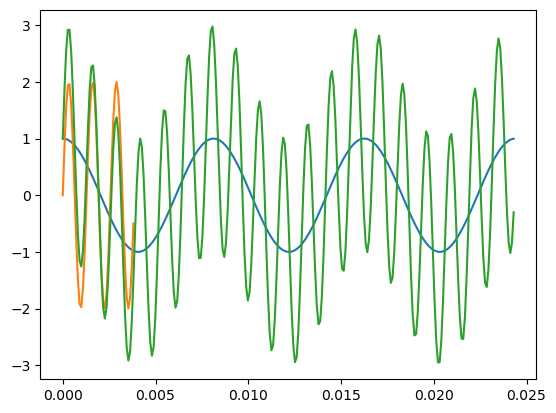

In [100]:
cos_sig2.plot()
sin_sig2.plot()
mix3.plot()

### Zadanie 3

Napisz funkcję o nazwie "stretch" lub "rozszerz", która pobiera falę dźwiękową (wave) oraz współczynnik rozszerzenia jako parametry. Zadaniem funkcji jest przyspieszenie lub opóźnienie dźwięku poprzez zmodyfikowanie czasu (ts) oraz częstotliwość (framerate). 

#### Definicja funkcji:


In [101]:
from IPython.display import Audio
def stretch(wave, stretch):
    wave1= Audio(data=wave.ys*stretch, rate=wave.framerate*stretch)
    return wave1

#### Import dźwięku oraz kontrolny odtwarzacz:

In [102]:
from thinkdsp import read_wave
melodia=read_wave(filename='Crash-Cymbal-2.wav')
melodia.make_audio()


#### Spowolnienie dźwieku oryginalnego:

In [103]:
melodia2=stretch(melodia,0.1)
melodia2

#### Przyśpieszenie dźwieku oryginalnego:

In [104]:
melodia3=stretch(melodia,2)
melodia3
